# Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. We have to predict the rings of each abalone which will lead us to the age of that abalone.
 

In [108]:
#Importing the nescessary libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc

# Loading the Data:

In [109]:
data=pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Remarks: In the above dataset I see that there is only one object datatype column and rest are all numeric columns. Since we need to find or rather predict the number of rings it becomes our target label. Rest all other columns are then automatically our feature columns that we will be making use of in predicting the label values.

# Understanding the Dataset:
    
There are 9 columns in the dataset.

Name / Data Type / Measurement Unit / Description:

1.Sex / nominal / -- / M, F, and I (infant)

2.Length / continuous / mm / Longest shell measurement

3.Diameter / continuous / mm / perpendicular to length

4.Height / continuous / mm / with meat in shell

5.Whole weight / continuous / grams / whole abalone

6.Shucked weight / continuous / grams / weight of meat

7.Viscera weight / continuous / grams / gut weight (after bleeding)

8.Shell weight / continuous / grams / after being dried

9.Rings / integer / -- / +1.5 gives the age in years

In [110]:
#checking the first 5 rows of the dataset

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [111]:
#checking the last 5 rows of the dataset

data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [112]:
#checking the dimension of dataset

data.shape

(4177, 9)

Remarks: The total number of rows present in our dataset is 4177 and there are 9 columns including the target label.

In [113]:
# checking the column names

data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# Preparing Data for Analysis:

In [114]:
# checking datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Remarks: With the help of info method, we are able to see the column datatype bifurcation. There are 7 float datatype columns, 1 integer datatype column and 1 object datatype column.

Since the object datatype is going to be one of the feature we will need to convert it later to numeric format using encoding techniques

In [115]:
#checking for null values

data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Remarks: We see that there are no null values present in any column of the dataset, so we don't need to worry about missing data.

# Summary Statistics of the Dataset:

In [116]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observations: As object datatype cannot be viewed in the describe metod, we see 'sex' column being omitted automatically. 
By looking at the other columns we can ignore the 'rings' column as that will be our label and does not need to be pre-processed. 
The other columns show slight deviations between the quantile ranges and the min-max values. However We do not see any drastic gap except for the 'height' and 'shell weight' columns. We will check for skewness and outliers and treat them if required.

# Exploring Data Variable

In [117]:
data.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

Remarks:

Target variable is discrete and categorical in nature.

Number of Rings ranges from 1 to 27.

In [118]:
data['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Observations:

Rings has most values concentrated in the categories of 9,10,8 and 11.

# Exploratory Data Analysis (EDA)

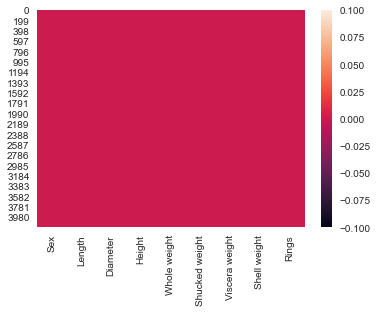

In [119]:
# UNIVARIATE ANALYSIS
# Visualizing null values with the help of heatmap

sns.heatmap(data.isnull())
plt.show()

Remarks: Dataset has no missing values. If there were any, we would have noticed in figure indicated by different colour shade

Text(0.5, 1.0, 'Sex Count')

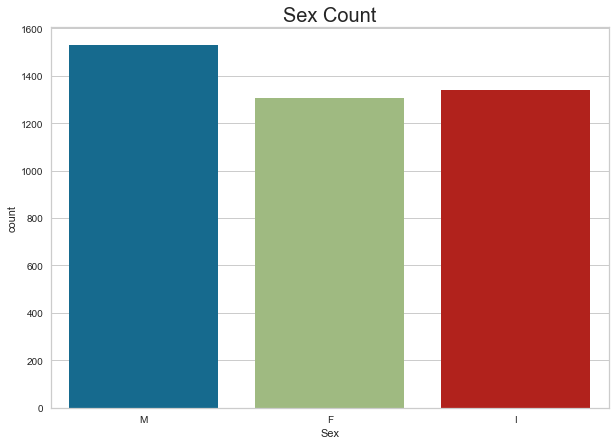

In [120]:
#UNIVARIATE ANALYSIS
# checking sex count with countplot

plt.figure(figsize=(10,7))
sns.countplot(x='Sex',data=data)
plt.title("Sex Count",fontsize=20)

Observations: In the above countplot we can see that list of categories that are present in the 'Sex' column and they are divided into 3 class namely M - Male, F - Female and I - Infant types. Looking at the plot we can see there are is not much of a class imbalance here but we do see the Male options being higher than the other two. If we were going to treat this as a classification problem then we have to apply an oversampling technique to get rid of the slighest of the imbalance.

# Distribution plot and Boxplot:

<AxesSubplot:xlabel='Rings', ylabel='Density'>

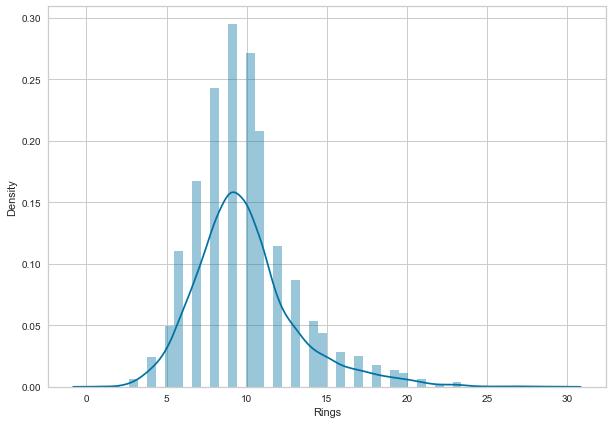

In [121]:
#Bivariate Analysis

plt.figure(figsize=(10,7))
sns.distplot(data.Rings)

Remarks: It shows that number of rings is not normally distributed. It is right skewed.

<AxesSubplot:xlabel='Height'>

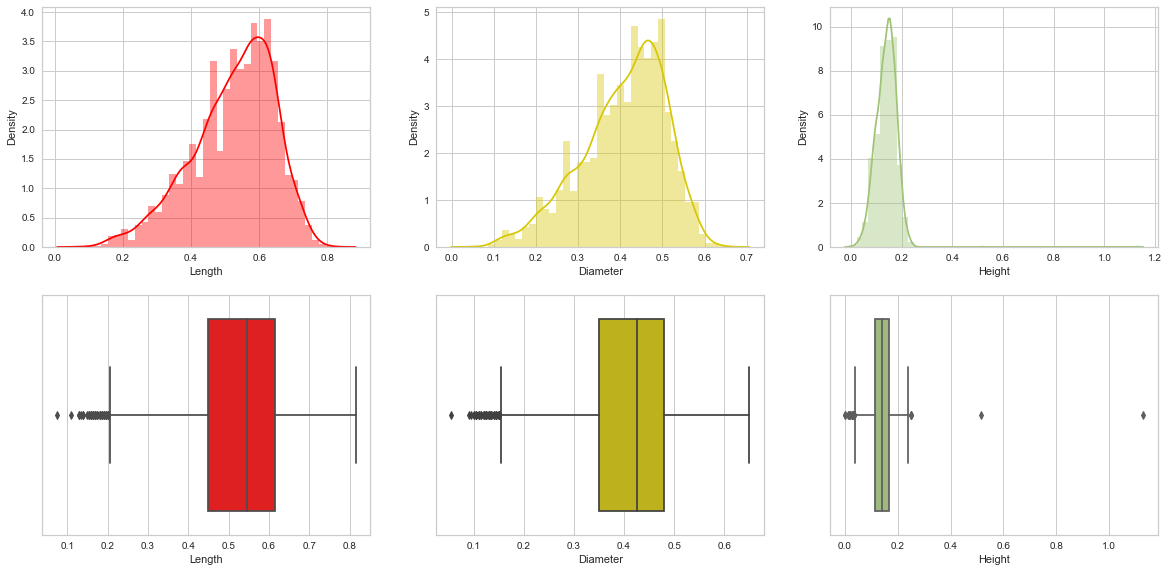

In [122]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(data.Length,color='red')
plt.subplot(3,3,2)
sns.distplot(data.Diameter,color='y')
plt.subplot(3,3,3)
sns.distplot(data.Height,color='g')
plt.subplot(3,3,4)
sns.boxplot(data.Length,color='red')
plt.subplot(3,3,5)
sns.boxplot(data.Diameter,color='y')
plt.subplot(3,3,6)
sns.boxplot(data.Height,color='g')

Remarks: From upper observation we can say Length , Diameter both are left skewed and Height is Power law distributed.

<AxesSubplot:title={'center':'Distribution of Shell weight'}, xlabel='Shell weight'>

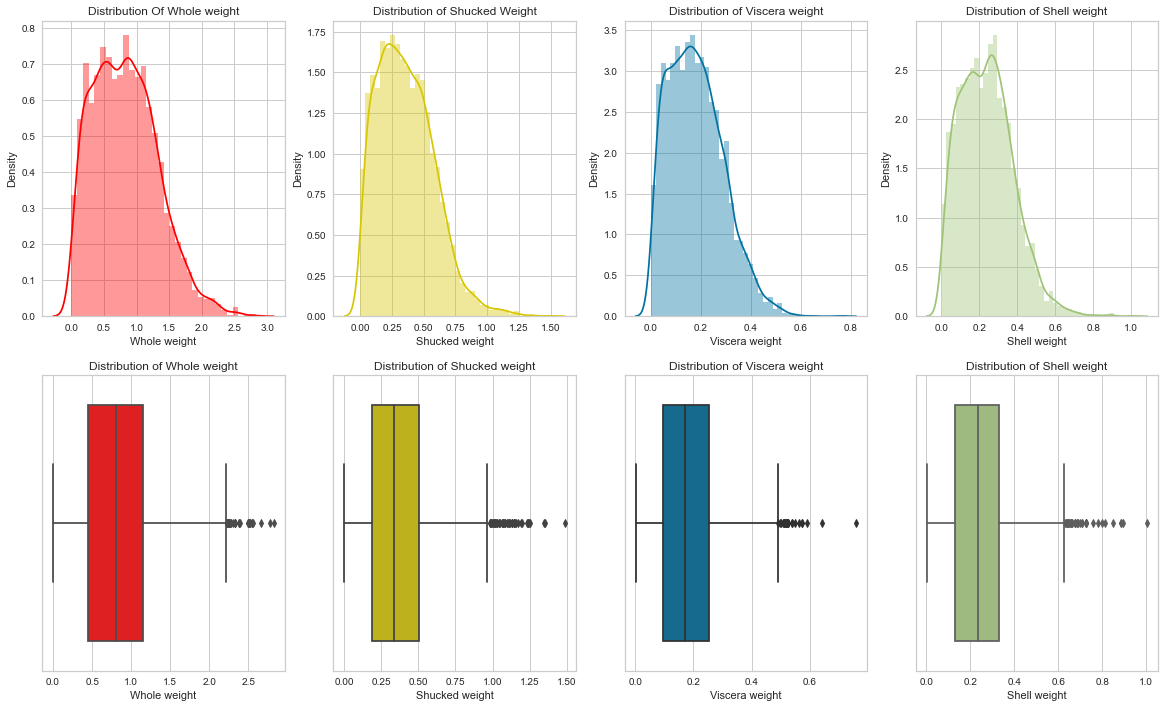

In [123]:
plt.figure(figsize=(20,25))
plt.subplot(4,4,1)
plt.title("Distribution Of Whole weight")
sns.distplot(data['Whole weight'],color='red')
plt.subplot(4,4,2)
plt.title("Distribution of Shucked Weight")
sns.distplot(data['Shucked weight'],color='y')
plt.subplot(4,4,3)
plt.title("Distribution of Viscera weight")
sns.distplot(data['Viscera weight'],color='b')
plt.subplot(4,4,4)
plt.title("Distribution of Shell weight")
sns.distplot(data['Shell weight'],color='g')
plt.subplot(4,4,5)
plt.title("Distribution of Whole weight")
sns.boxplot(data['Whole weight'],color='red')
plt.subplot(4,4,6)
plt.title("Distribution of Shucked weight")
sns.boxplot(data['Shucked weight'],color='y')
plt.subplot(4,4,7)
plt.title("Distribution of Viscera weight")
sns.boxplot(data['Viscera weight'],color='b')
plt.subplot(4,4,8)
plt.title("Distribution of Shell weight")
sns.boxplot(data['Shell weight'],color='g')

Remarks: In the above distribution plots and boxplots, we see that there are skewness(right skewed) due to the outliers but still many of they are able to retain or rather showcase a bell shape curve indicating a normal distribution. So we can assume that not all outliers are to be removed and some might actually be genuine data therefore the outliers will need to be treated accordingly.

# Scatterplot:

In [124]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [125]:
col=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
df=data[col]

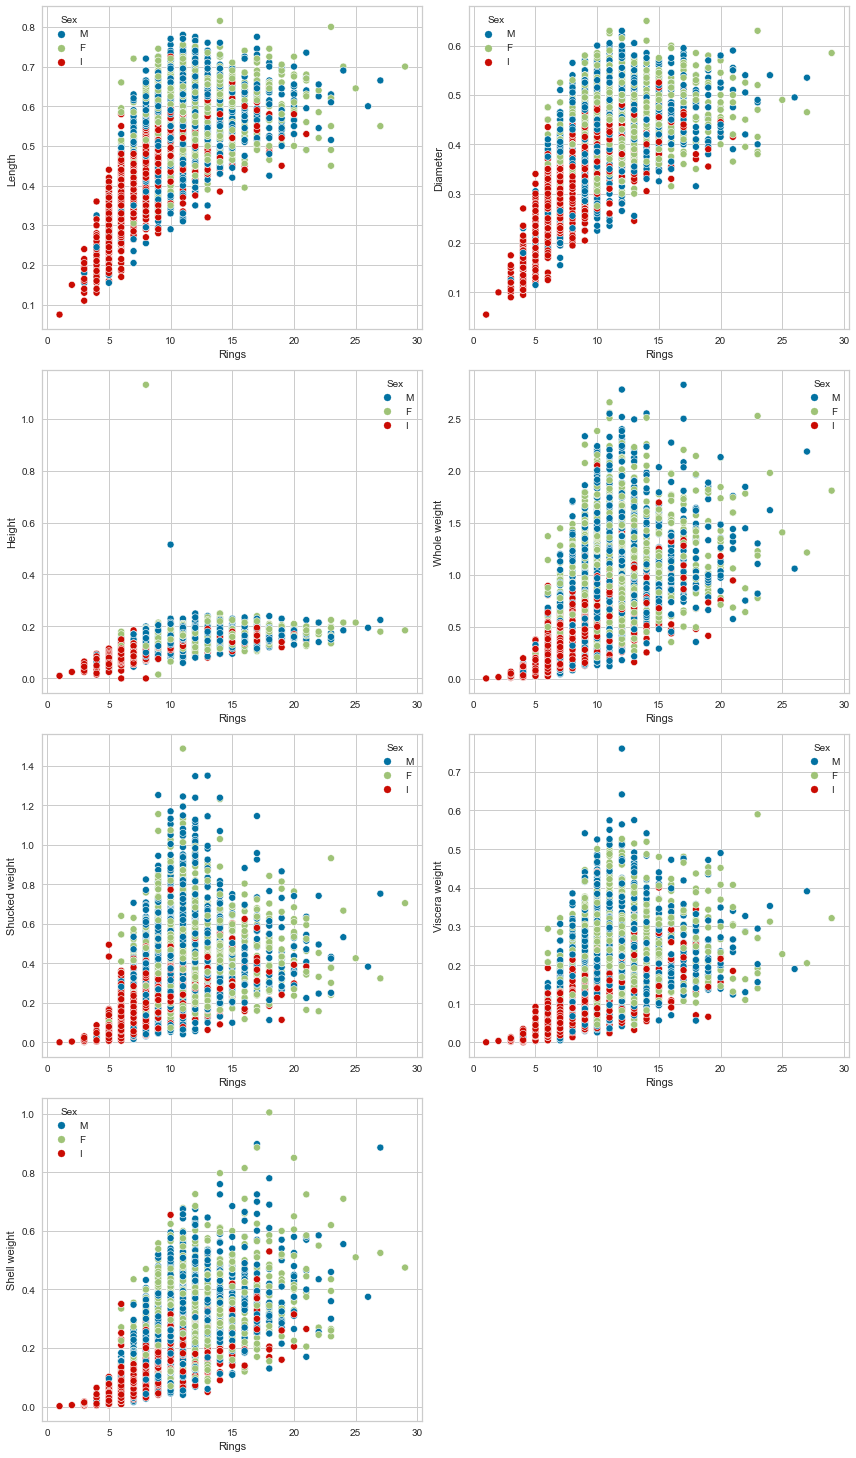

In [126]:
#Bivariate analysis

plt.figure(figsize=(12,25))
for i in range(0,len(col)):
  plt.subplot(5,2,i+1)
  sns.scatterplot(x=data.Rings,y=data[col[i]],hue=data.Sex)
  plt.tight_layout()

Remarks: From above observation we can say Height dont have a good relationship with rings and another observation shows that sex male have the high values as compared to other like F,I on Rings.

In [127]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

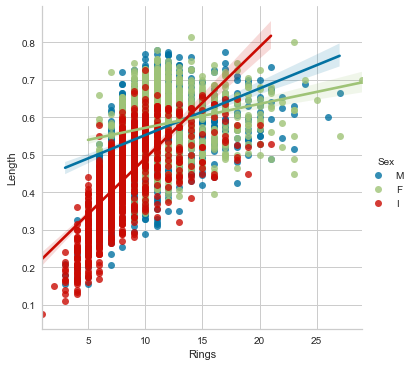

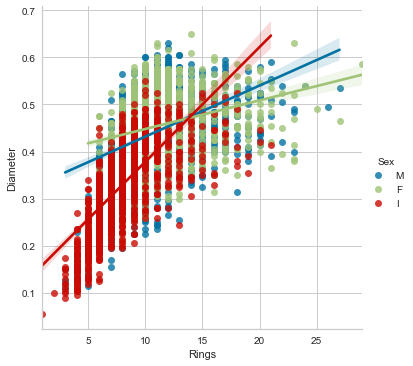

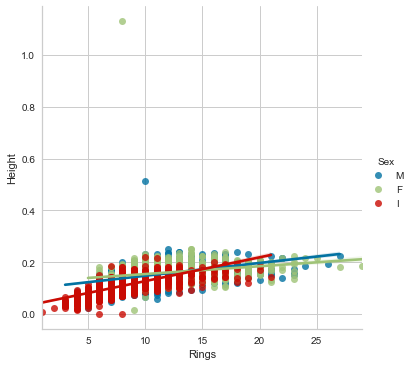

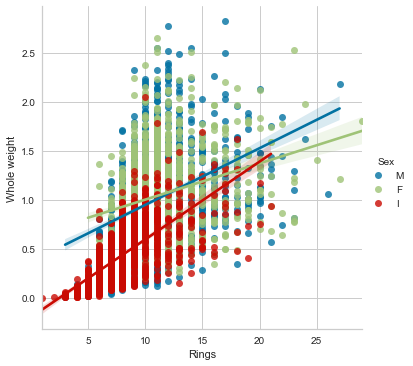

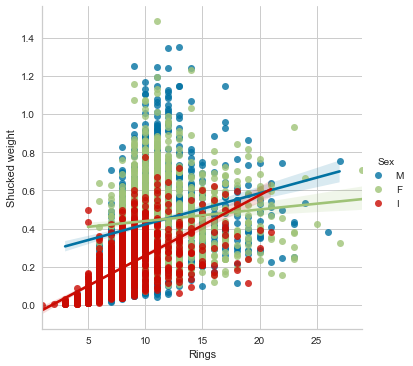

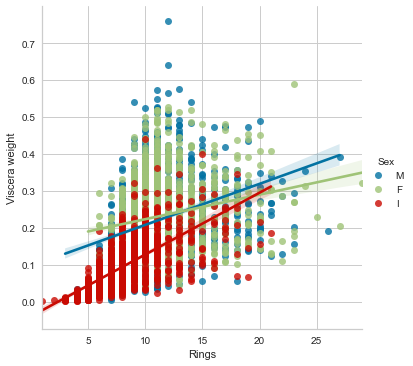

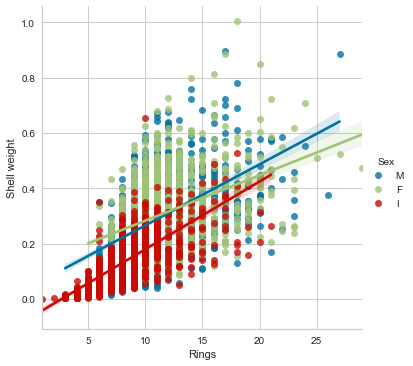

In [128]:
sns.lmplot(x='Rings',y='Length',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Diameter',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Height',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Whole weight',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Shucked weight',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Viscera weight',data=data,hue='Sex')
sns.lmplot(x='Rings',y='Shell weight',data=data,hue='Sex')

Remarks: we can see most of the time male is having height value with all the features as respect to rings

# Pairplot

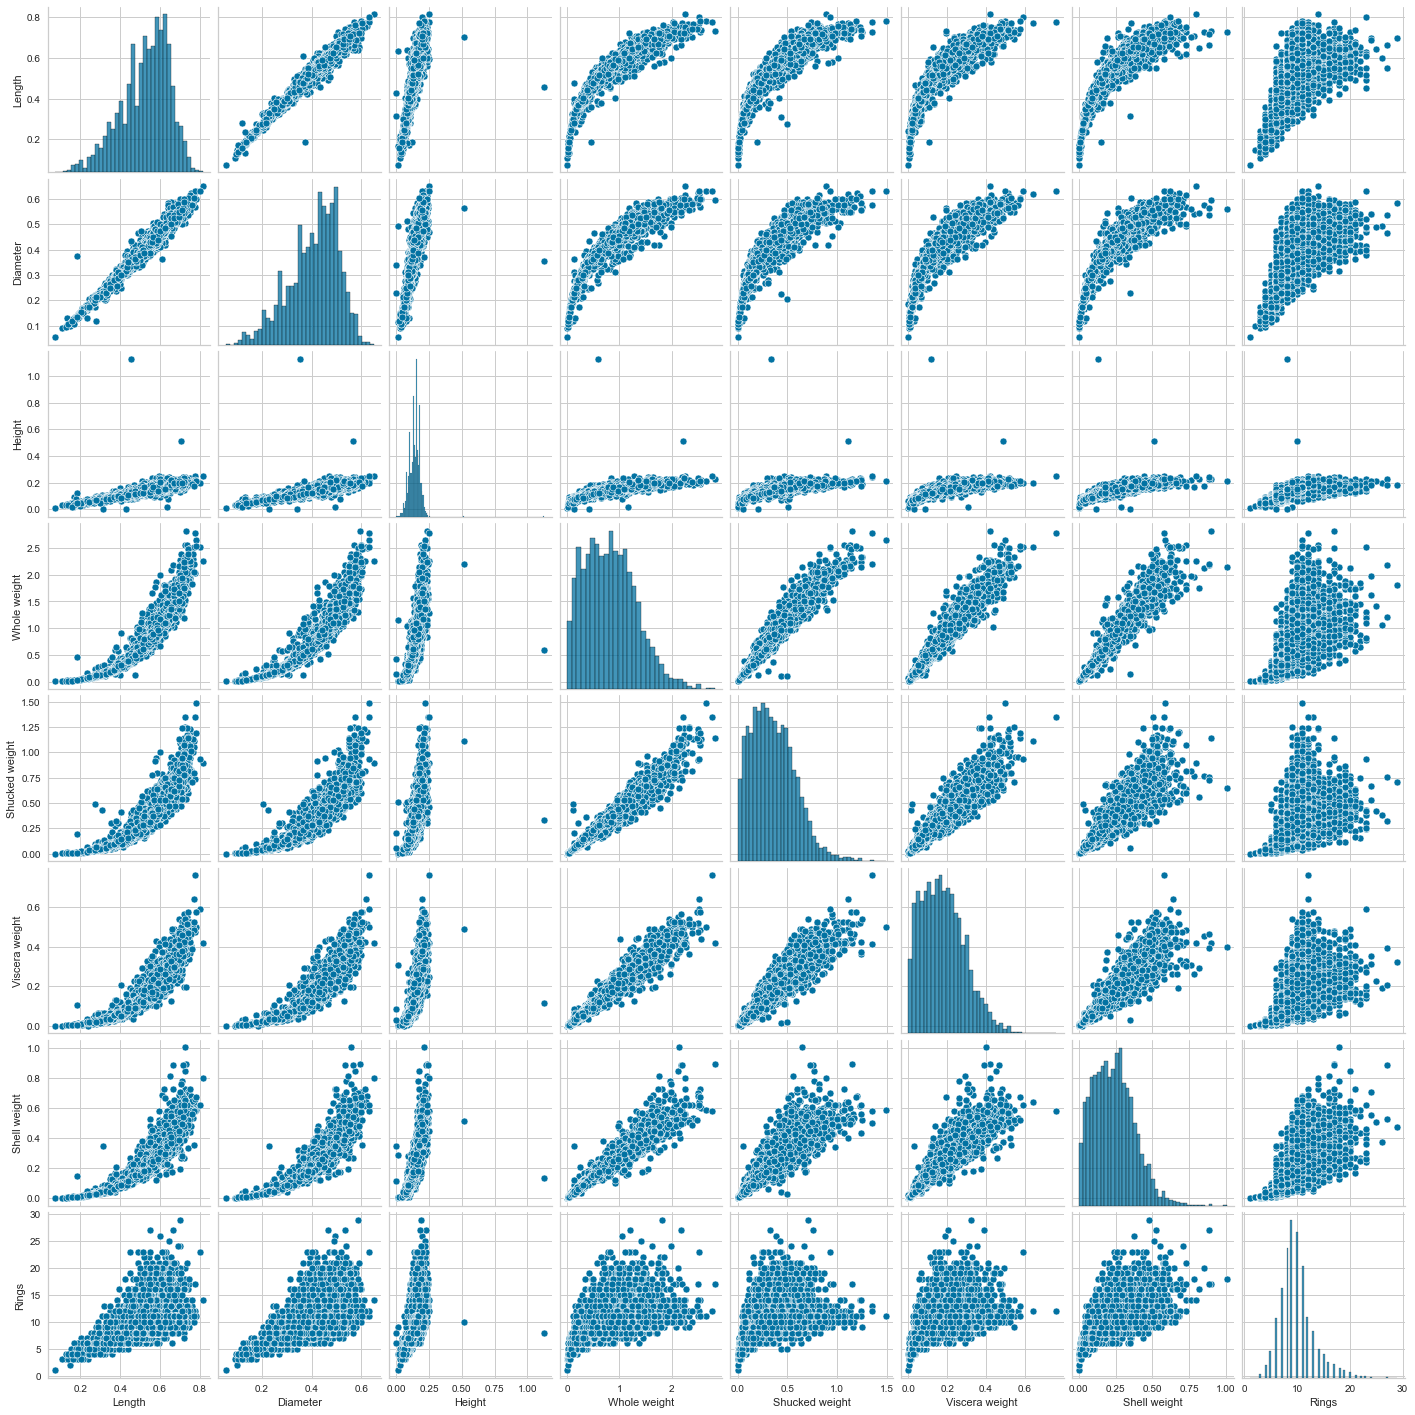

In [129]:
sns.pairplot(data)

Remarks: The pairplot gives us a visualization on scatter plot + histogram showing us the outliers as well as the skewness data

# Histogram:

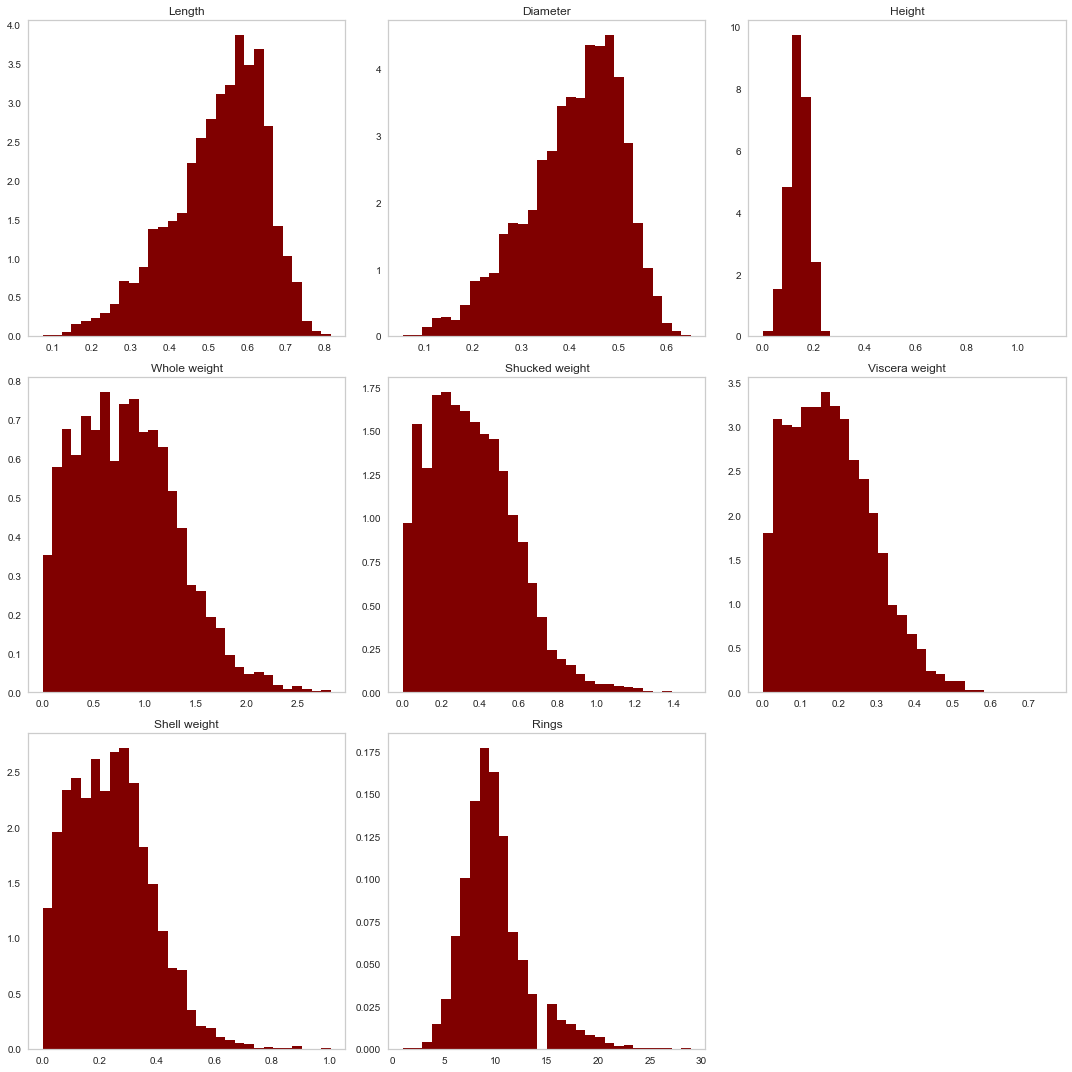

In [130]:
plt.rcParams['figure.figsize'] = (15,15)
data.hist(bins=30, color='maroon', density=True, label='Value', histtype='stepfilled', grid=False)
plt.tight_layout()
plt.show()

Observations: The above histogram shows us how the data is placed in our data set and if there are sections that have no entries for it. Like if I see in 'Rings' label the section near 15 is empty showing that possible there was not enough data collected that might fill in those number points too. Again in histogram we are confirming skewness that will need to be treated.

In [131]:
#Exploring data variable

data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [132]:
def labels(x):
  if x<=10:
    return 'young'
  if x<=20:
    return 'middle_age'
  if x<=30:
    return 'old'
data['Rings']=data['Rings'].apply(labels)

Remarks: We have converted target column into bins because most of the values was having less then 10 count so it will be hard for model to predict those value.

# Feature Engineering

In [133]:
# Encoding Categorical features into ordinal numerical value

oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df[column]=oe.fit_transform(df[column])
  return df

In [134]:
ordinal_column=['Sex','Rings']
data=ordinal_encoder(data,ordinal_column)

In [135]:
# pre-processing the data

def preprocessing(df):
  df=df.copy()
  df=ordinal_encoder(df,['Sex'])
  return df

In [136]:
df=preprocessing(data)

In [137]:
df['Rings'].value_counts()

2.0    2730
0.0    1411
1.0      36
Name: Rings, dtype: int64

In [138]:
df['Sex'].value_counts()

2.0    1528
1.0    1342
0.0    1307
Name: Sex, dtype: int64

In [139]:
df['Sex'].value_counts()

2.0    1528
1.0    1342
0.0    1307
Name: Sex, dtype: int64

In [140]:
X=df.drop("Rings",axis=1)
y=df['Rings']

In [141]:
X['Sex'].value_counts()

2.0    1528
1.0    1342
0.0    1307
Name: Sex, dtype: int64

In [142]:
X.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
dtype: object

# Checking Outliers

<AxesSubplot:xlabel='variable', ylabel='value'>

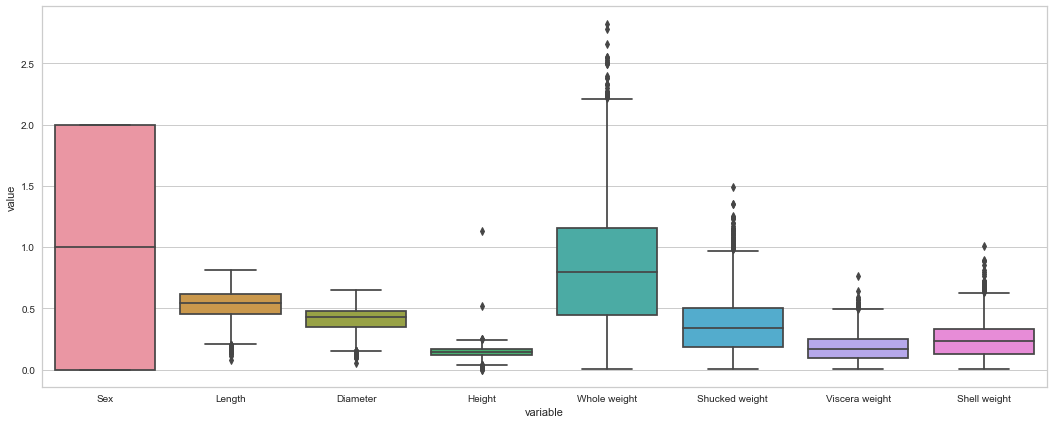

In [143]:
plt.figure(figsize=(18,7))
sns.boxplot(x='variable',y='value',data=pd.melt(X))

In [144]:
#Removing the outliers

for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col] <=percentile[0]] = percentile[0]
  X[col][X[col] >=percentile[1]] = percentile[1]

# After Removing Outliers:

<AxesSubplot:xlabel='variable', ylabel='value'>

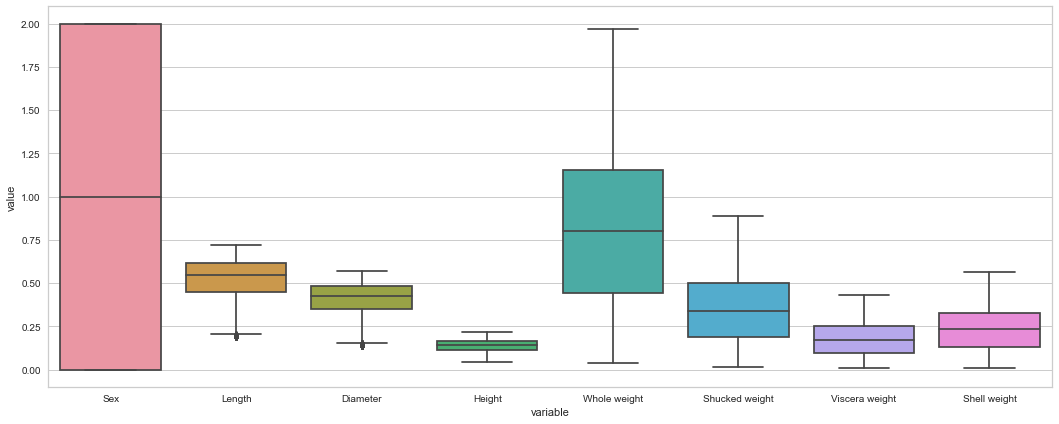

In [145]:
plt.figure(figsize=(18,7))
sns.boxplot(x='variable',y='value',data=pd.melt(X))

Remarks: As we can see here, we removed lot of outliers without losing any data.

# Checking Correlation

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.


In [146]:
X_corr=X.corr()
X_corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Sex,1.000000,-0.036700,-0.039081,-0.041480,-0.024806,-0.007153,-0.035272,-0.035057
Length,-0.036700,1.000000,0.987158,0.902563,0.932859,0.911043,0.910932,0.912185
Diameter,-0.039081,0.987158,1.000000,0.908492,0.932539,0.906088,0.907362,0.919158
Height,-0.041480,0.902563,0.908492,1.000000,0.897156,0.850904,0.876718,0.902978
Whole weight,-0.024806,0.932859,0.932539,0.897156,1.000000,0.971410,0.968691,0.962339
Shucked weight,-0.007153,0.911043,0.906088,0.850904,0.971410,1.000000,0.936792,0.898567
Viscera weight,-0.035272,0.910932,0.907362,0.876718,0.968691,0.936792,1.000000,0.921006
Shell weight,-0.035057,0.912185,0.919158,0.902978,0.962339,0.898567,0.921006,1.000000


<AxesSubplot:>

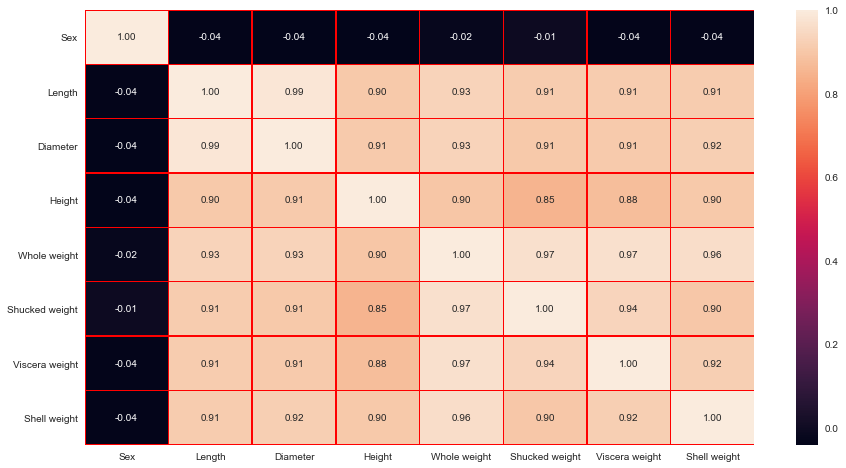

In [147]:
#MULTIVARIATE ANALYSIS
# Visualizing Correlation heatmap


plt.figure(figsize=(15,8))
X_corr=X.corr()
sns.heatmap(X_corr,annot=True,linewidths=0.5,linecolor="red", fmt= '.2f')

Remarks: We have lots of columns that are correralted with each other. In real life, if two features are highly correlated to each other we can drop one of them but in this case we have less columns so we will not do anything

# Checking Skewness

In [148]:
X.skew()

Sex              -0.098155
Length           -0.629471
Diameter         -0.607930
Height           -0.260146
Whole weight      0.374051
Shucked weight    0.462861
Viscera weight    0.424164
Shell weight      0.370577
dtype: float64

In [149]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2.0,0.455,0.365,0.095,0.5140,0.22450,0.1010,0.1500
1,2.0,0.350,0.265,0.090,0.2255,0.09950,0.0485,0.0700
2,0.0,0.530,0.420,0.135,0.6770,0.25650,0.1415,0.2100
3,2.0,0.440,0.365,0.125,0.5160,0.21550,0.1140,0.1550
4,1.0,0.330,0.255,0.080,0.2050,0.08950,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.37000,0.2390,0.2490
4173,2.0,0.590,0.440,0.135,0.9660,0.43900,0.2145,0.2605
4174,2.0,0.600,0.475,0.205,1.1760,0.52550,0.2875,0.3080
4175,0.0,0.625,0.485,0.150,1.0945,0.53100,0.2610,0.2960


# Feature Scaling:

In [150]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [151]:
x=data.drop("Rings",axis=1)

In [152]:
X=pd.DataFrame(X,columns=x.columns)
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.495238,0.523256,0.294118,0.247577,0.240873,0.219343,0.252213
1,1.0,0.295238,0.290698,0.264706,0.098225,0.098176,0.095680,0.107699
2,0.0,0.638095,0.651163,0.529412,0.331960,0.277404,0.314741,0.360598
3,1.0,0.466667,0.523256,0.470588,0.248613,0.230599,0.249965,0.261245
4,0.5,0.257143,0.267442,0.205882,0.087613,0.086760,0.074481,0.080603
...,...,...,...,...,...,...,...,...
4172,0.0,0.704762,0.720930,0.705882,0.440673,0.406973,0.544401,0.431049
4173,1.0,0.752381,0.697674,0.529412,0.481570,0.485742,0.486691,0.451823
4174,1.0,0.771429,0.779070,0.941176,0.590284,0.584488,0.658642,0.537628
4175,0.0,0.819048,0.802326,0.617647,0.548093,0.590767,0.596222,0.515951


In [153]:
X.skew()

Sex              -0.098155
Length           -0.629471
Diameter         -0.607930
Height           -0.260146
Whole weight      0.374051
Shucked weight    0.462861
Viscera weight    0.424164
Shell weight      0.370577
dtype: float64

Remarks: As we can see from the above analyis, We have imbalanced data so we have to balance it,and in order to do so, We are going to use smote for over-sampling because it over sample the data.

# Sampling the data

In [154]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=X.columns)
y_new=pd.DataFrame(y_res,columns=['Rings'])

<AxesSubplot:title={'center':'Balanced Data'}, xlabel='Rings', ylabel='count'>

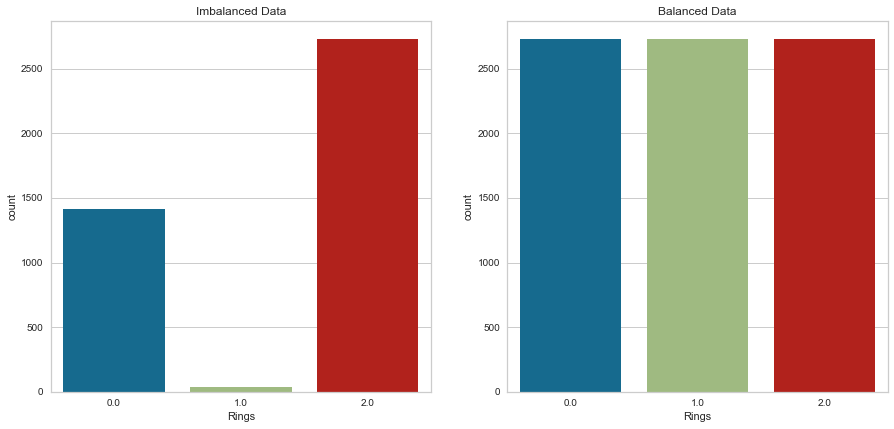

In [155]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Imbalanced Data")
sns.countplot(data['Rings'])
plt.subplot(2,2,2)
plt.title("Balanced Data")
sns.countplot(y_new['Rings'])

Remarks: After labeling rings into young,middle age and old it will not effect our result and we can still predict it, if it comes in young we can say its age is less then 10 and if comes to middle age, we can say its age is less than 20 or greater than 10.

# Preparing Data for Model building

In [156]:
#Handling skewness of data

X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [157]:
X_new.skew()

Sex              -0.049610
Length           -0.146036
Diameter         -0.143006
Height           -0.081660
Whole weight     -0.034082
Shucked weight   -0.006437
Viscera weight   -0.024288
Shell weight     -0.047548
dtype: float64

In [158]:
y_new

,Rings
0,0.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
8185,1.0
8186,1.0
8187,1.0
8188,1.0


# Spliting train test data with best random_state

In [159]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

# Finding Best Model

In [160]:
models={
    "ExtraTreesClassifier":ExtraTreesClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBClassifier":XGBClassifier(),
    "LGBMClassifier":LGBMClassifier(),
    "BaggingClassifier":BaggingClassifier(),
    "LogisticRegression":LogisticRegression()
}

In [161]:
X_new.shape,y_new.shape

((8190, 8), (8190, 1))

*************************** ExtraTreesClassifier ******************************


ExtraTreesClassifier()


Cross_Val_Score== 0.8877899877899879


Test Score of is== 0.8803418803418803


Confusion Matrix:

[[720  21  91]
 [  1 798   0]
 [175   6 645]]


Classification Report:

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83       832
         1.0       0.97      1.00      0.98       799
         2.0       0.88      0.78      0.83       826

    accuracy                           0.88      2457
   macro avg       0.88      0.88      0.88      2457
weighted avg       0.88      0.88      0.88      2457



ROC_AUC CURVE


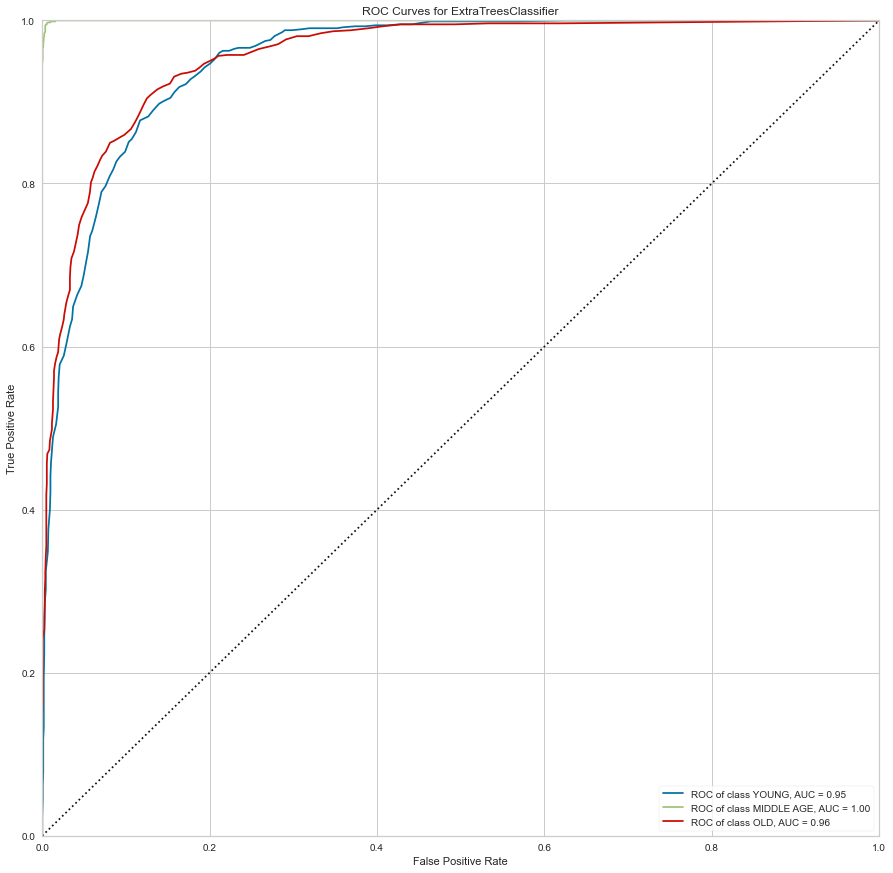



*************************** RandomForestClassifier ******************************


RandomForestClassifier()


Cross_Val_Score== 0.876923076923077


Test Score of is== 0.8616198616198616


Confusion Matrix:

[[702  25 105]
 [  6 793   0]
 [198   6 622]]


Classification Report:

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.81       832
         1.0       0.96      0.99      0.98       799
         2.0       0.86      0.75      0.80       826

    accuracy                           0.86      2457
   macro avg       0.86      0.86      0.86      2457
weighted avg       0.86      0.86      0.86      2457



ROC_AUC CURVE


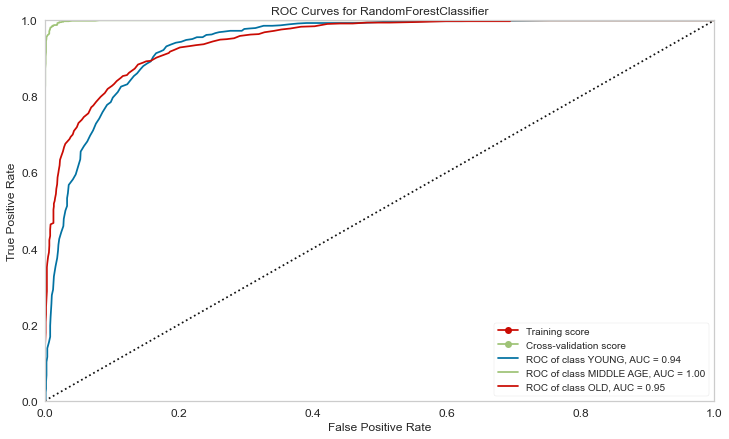



*************************** XGBClassifier ******************************


[23:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, v

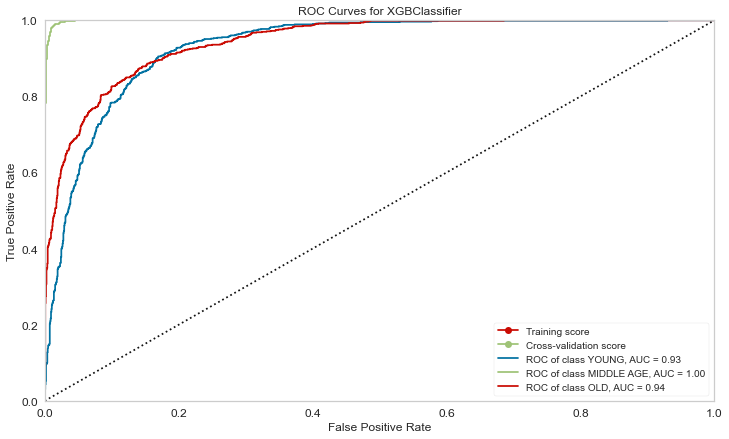



*************************** LGBMClassifier ******************************


LGBMClassifier()


Cross_Val_Score== 0.8583638583638583


Test Score of is== 0.8542938542938543


Confusion Matrix:

[[662  38 132]
 [  4 795   0]
 [180   4 642]]


Classification Report:

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       832
         1.0       0.95      0.99      0.97       799
         2.0       0.83      0.78      0.80       826

    accuracy                           0.85      2457
   macro avg       0.85      0.86      0.85      2457
weighted avg       0.85      0.85      0.85      2457



ROC_AUC CURVE


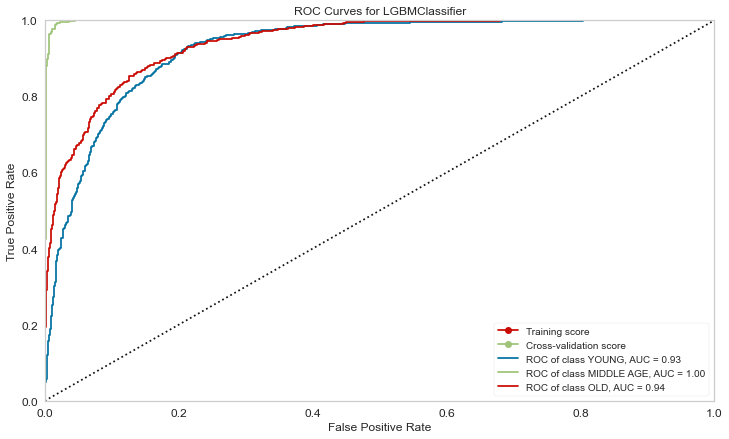



*************************** BaggingClassifier ******************************


BaggingClassifier()


Cross_Val_Score== 0.8505494505494505


Test Score of is== 0.8384208384208384


Confusion Matrix:

[[693  41  98]
 [ 15 784   0]
 [231  12 583]]


Classification Report:

              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78       832
         1.0       0.94      0.98      0.96       799
         2.0       0.86      0.71      0.77       826

    accuracy                           0.84      2457
   macro avg       0.84      0.84      0.84      2457
weighted avg       0.84      0.84      0.84      2457



ROC_AUC CURVE


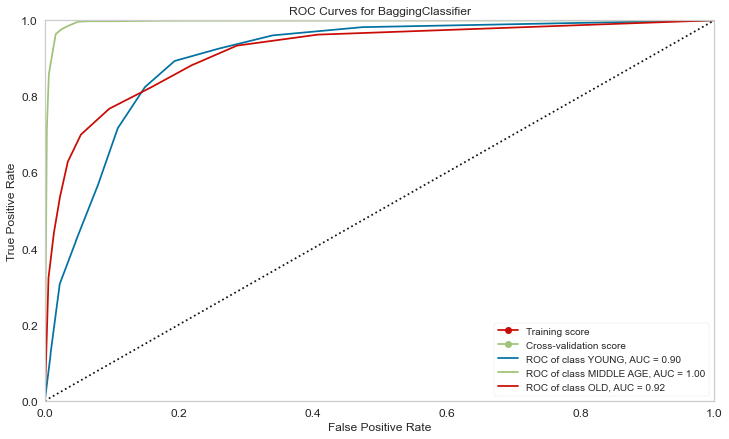



*************************** LogisticRegression ******************************


LogisticRegression()


Cross_Val_Score== 0.7378510378510379


Test Score of is== 0.7305657305657306


Confusion Matrix:

[[455 146 231]
 [104 693   2]
 [168  11 647]]


Classification Report:

              precision    recall  f1-score   support

         0.0       0.63      0.55      0.58       832
         1.0       0.82      0.87      0.84       799
         2.0       0.74      0.78      0.76       826

    accuracy                           0.73      2457
   macro avg       0.73      0.73      0.73      2457
weighted avg       0.72      0.73      0.73      2457



ROC_AUC CURVE


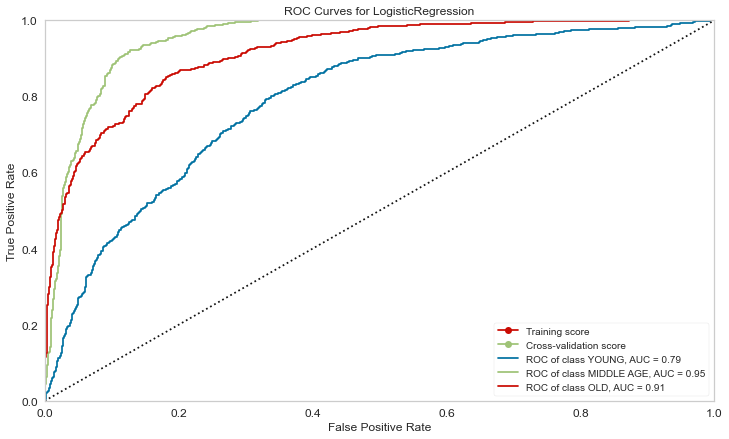

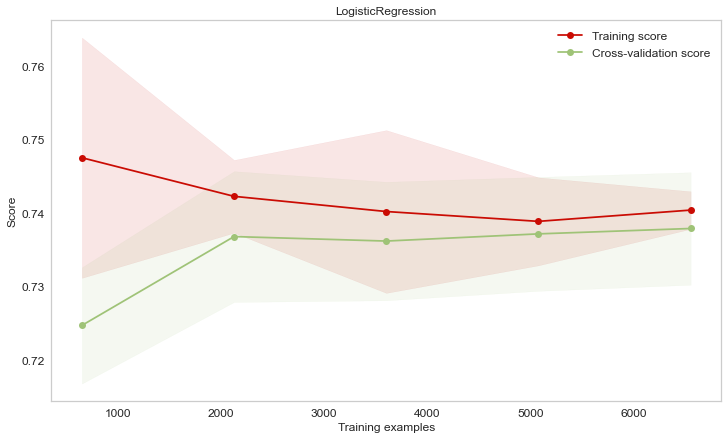

In [162]:
Model=[]
Score=[]
CVS=[]
train=[]
for name,model in models.items():
  print('***************************',name,'******************************')
  print('\n')
  Model.append(name)
  model.fit(X_train,y_train)
  print(model)
  print("\n")
  train_hat=model.predict(X_train)
  accs=accuracy_score(y_train,train_hat)
  train.append(accs)
  y_pred=model.predict(X_test)
  As_test=accuracy_score(y_test,y_pred)
  Score.append(As_test*100)
  cv=cross_val_score(model,X_new,y_new,cv=5,scoring='accuracy').mean()
  print("Cross_Val_Score==",cv)
  CVS.append(cv*100)
  print("\n")
  print("Test Score of is==",As_test)
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print("Confusion Matrix:\n")
  print(cm)
  print("\n")
  report=classification_report(y_test,y_pred)
  print("Classification Report:\n")
  print(report)
  print("\n")
  print("ROC_AUC CURVE")
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['YOUNG','MIDDLE AGE','OLD'],micro=False,macro=False)
  print("\n")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,
                                       cv=5,shuffle=True,scoring='accuracy',
                                       n_jobs=-1,figsize=(12,7),title_fontsize="large",text_fontsize="large",
                                       title=name)

In [163]:
models_score=pd.DataFrame({
    "Model":Model,
    "Accuracy_Score":Score,
    "Cross_Val_Score":CVS
})

In [164]:
models_score

,Model,Accuracy_Score,Cross_Val_Score
0,ExtraTreesClassifier,88.034188,88.778999
1,RandomForestClassifier,86.161986,87.692308
2,XGBClassifier,85.551486,86.031746
3,LGBMClassifier,85.429385,85.836386
4,BaggingClassifier,83.842084,85.054945
5,LogisticRegression,73.056573,73.785104


Remarks: As we can see ExtraTreesClassifier And RandomForestClassifier is giving us high accuracy value.

# Hyper parameter tuning

In [165]:
Etree=ExtraTreesClassifier()
Etree.fit(X_train,y_train)

ExtraTreesClassifier()

In [166]:
y_pred=Etree.predict(X_test)

In [167]:
acc_score=accuracy_score(y_test,y_pred)
acc_score

0.8803418803418803

In [168]:
Tree={
  "criterion":['gini','entropy'],
  "min_samples_leaf":[1,2,3],
  "min_samples_split":[1,2,3,4],
  "max_depth":[1,2,3,4,5,None],
  "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3]
}

In [169]:
RandomForest={
    "bootstrap":[True,False],
    "criterion":['gini','entropy'],
    "min_samples_leaf":[1,2,3],
    "min_samples_split":[1,2,3,4],
}

In [170]:
tree=ExtraTreesClassifier()
rf=RandomForestClassifier()

In [171]:
Grid=GridSearchCV(estimator=tree,param_grid=Tree,cv=5,n_jobs=-1)

Remarks: We are using the Grid Search CV method for hyper parameter tuning the best model.

In [ ]:
Grid.fit(X_train,y_train)

Remarks:  we have trained the Grid Search CV with the list of parameters that we feel it should check for best possible outcomes

In [ ]:
Grid.best_params_

Remarks: Here the Grid Search CV has provided us with the best parameters list out of all the combinations it used to train the model

In [ ]:
Grid.best_score_

In [ ]:
Grid_RandomForest=GridSearchCV(estimator=rf,param_grid=RandomForest,cv=5,n_jobs=-1)
Grid_RandomForest.fit(X_train,y_train)

In [ ]:
Grid_RandomForest.best_score_

Remarks: After comparing both ExtraTreesClassifier and RandomForestClassifier, we saw that ExtraTreesClassifier is giving us 88% accuracy. Hence, we will us it only.

# Saving the best model

In [ ]:
import joblib
joblib.dump(Etree,"Abalone_Model.obj")

In [ ]:
model=joblib.load('Abalone_Model.obj')

# Conclusion:

In [ ]:
y_preds=model.predict(X_test)
predicted=pd.DataFrame(y_pred,columns=['predicted'])
predicted

Summary:

This was a classification problem where data was totally imbalanced and our target column also having a lot of values that were having only one count and some of the values were having less than 15 count so we converted them into bins,and we did lot of EDA to understand the impact of features on our target column,and if We talk about correlation, we were having high positive correlation. We have also applied PCA but in this case it was not working so we deleted that cells but we achieved 88% accuracy using EXTRATREESCLASSIFIER.